In [1]:
import gala
from gala import potential
import multiprocessing as mp

In [2]:
import yt
import numpy as np
import pandas as pd
from unyt import unyt_array, unyt_quantity
import matplotlib.pyplot as plt

import galexquared as gal
from galexquared.class_methods import random_vector_spherical

import smplotlib

pd.options.display.max_columns = 1000

In [3]:
gal.config.code = "ART"

In [4]:
if gal.config.code == "ART":
    MT = gal.MergerTree("merger_trees_csv/ART_CompleteTree.csv") #gal.MergerTree("merger_trees_csv/ART_NewTree.csv") #gal.MergerTree("merger_trees_csv/ART_CompleteTree.csv") #gal.MergerTree("selected_halos_ART/New_tree.csv")
    MT.set_equivalence("ART_equivalence.dat")
    pdir = "/media/asier/EXTERNAL_USBA/Cosmo_v18/"

elif gal.config.code == "GEAR":
    MT = gal.MergerTree("merger_trees_csv/GEAR_NewTree.csv")
    MT.set_equivalence("GEAR_equivalence.dat")
    pdir = "/media/asier/T7/GEAR/"

if gal.config.code == "ART":
    #candidates = pd.read_csv("/home/asier/StructuralAnalysis/satellite_tables/ART_satellitesV5_Rvir1.0.csv")
    #candidates1_5 = pd.read_csv("/home/asier/StructuralAnalysis/satellite_tables/ART_satellitesV5_Rvir1.5.csv")
    candidates = pd.read_csv("./selected_halos_ART/ART_Satellites_RRvir2.0.csv")
    candidates3 = pd.read_csv("./selected_halos_ART/ART_Satellites_RRvir3.0.csv")
    candidates4 = pd.read_csv("./selected_halos_ART/ART_Satellites_RRvir4.0.csv")
    candidates5 = pd.read_csv("./selected_halos_ART/ART_Satellites_RRvir5.0.csv")

elif gal.config.code == "GEAR":
    #candidates = pd.read_csv("/home/asier/StructuralAnalysis/satellite_tables/GEAR_satellitesV5_Rvir1.0.csv")
    #candidates1_5 = pd.read_csv("/home/asier/StructuralAnalysis/satellite_tables/GEAR_satellitesV5_Rvir1.5.csv")
    candidates = pd.read_csv("./selected_halos_GEAR/GEAR_Satellites_RRvir2.0.csv")
    candidates3 = pd.read_csv("./selected_halos_GEAR/GEAR_Satellites_RRvir3.0.csv")
    candidates4 = pd.read_csv("./selected_halos_GEAR/GEAR_Satellites_RRvir4.0.csv")
    candidates5 = pd.read_csv("./selected_halos_GEAR/GEAR_Satellites_RRvir5.0.csv")

candidates

,Sub_tree_id,Halo_ID,Snapshot,Redshift,Time,uid,desc_uid,mass,num_prog,virial_radius,scale_radius,vrms,vmax,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,A[x],A[y],A[z],b_to_a,c_to_a,T_U,Tidal_Force,Tidal_ID,Secondary,Halo_at_z0,TreeNum,R/Rvir,peak_mass,has_stars,has_galaxy,delta_rel,stellar_mass
0,87.0,269.0,92.0,6.998720,0.786370,493835.0,504749.0,1.649573e+08,1.0,18.115385,12.897436,20.860001,17.889999,42498.035156,43971.957031,42940.699219,-112.919998,97.330002,-37.020000,0.345340,0.955510,-0.300960,0.717660,0.527720,0.866700,0.99320,493979.0,False,3306322.0,0.0,1.857622,1.997151e+08,True,True,0.000000,4.925645e+05
1,98.0,278.0,98.0,6.646430,0.841230,561979.0,574049.0,3.066952e+08,1.0,22.267807,10.316239,22.530001,21.280001,42570.886719,43980.101562,42972.191406,-172.229996,113.209999,18.379999,1.581800,0.389650,0.711410,0.431690,0.424260,0.666900,0.86982,561543.0,False,3306322.0,0.0,2.067483,3.770655e+08,True,True,0.017090,4.831632e+05
2,101.0,363.0,94.0,6.903264,0.800634,515628.0,527080.0,2.632479e+08,1.0,21.166666,6.877493,24.320000,21.230000,42479.773438,44023.761719,42981.937500,-86.070000,-30.830000,56.160000,0.436940,1.486200,0.210720,0.593770,0.280190,0.779900,2.10266,515626.0,False,3306322.0,0.0,2.313928,4.762108e+08,True,True,0.000000,5.032872e+05
3,102.0,8745.0,113.0,5.925687,0.975573,740135.0,752552.0,2.678063e+09,1.0,45.837608,11.752136,54.250000,43.900002,42374.531250,44145.898438,43049.363281,-80.699997,77.690002,-41.869999,-1.239510,-0.387498,2.414690,0.756831,0.596590,0.809122,0.89262,739572.0,False,3306322.0,0.0,2.002121,3.230769e+09,True,True,0.008247,1.936844e+07
4,108.0,90.0,126.0,5.273132,1.131168,907393.0,921163.0,2.921652e+10,5.0,101.611115,41.891739,101.059998,88.070000,42315.843750,43960.417969,42732.425781,-40.009998,176.000000,86.550003,-3.043990,-0.970750,4.290160,0.609640,0.430120,0.748000,0.90478,906494.0,False,3306322.0,0.0,2.010384,3.487180e+10,True,True,0.006461,4.819847e+08
5,200.0,46.0,127.0,5.213495,1.147433,921173.0,934263.0,1.968661e+08,1.0,19.190884,2.497151,21.580000,18.400000,42322.949219,44009.476562,42691.167969,-61.189999,177.960007,65.459999,0.900830,-0.761200,0.865440,0.742700,0.535480,0.726700,2.01910,921163.0,False,3306322.0,0.0,2.119498,1.396154e+09,True,True,0.007803,3.879482e+06
6,213.0,89.0,188.0,3.074647,2.150688,1691870.0,1703365.0,3.082621e+10,2.0,102.940170,31.196581,85.309998,72.760002,42030.472656,44553.933594,42850.187500,-71.360001,215.279999,127.900002,-1.451370,3.211630,3.187280,0.752600,0.513800,0.747400,0.79843,1691022.0,False,3306322.0,0.0,2.083006,3.190883e+10,True,True,0.005159,4.498760e+08
7,236.0,122.0,180.0,3.282655,1.997697,1599051.0,1610662.0,1.679487e+09,1.0,39.059830,6.934473,32.450001,30.930000,42005.531250,44464.648438,42823.761719,-24.700001,251.360001,134.639999,1.913760,0.327100,0.454830,0.751220,0.628120,0.627200,1.46563,1598885.0,False,3306322.0,0.0,2.019102,2.737892e+09,True,True,0.002789,8.635104e+06
8,239.0,626.0,218.0,2.313452,2.916936,2027415.0,2038427.0,3.254986e+10,2.0,104.232193,17.602564,80.790001,72.269997,41609.914062,45414.160156,43677.722656,-52.410000,93.620003,-12.430000,5.457850,1.536740,1.056380,0.743320,0.550790,0.682100,0.81661,2026471.0,False,3306322.0,0.0,2.039645,4.079772e+10,True,True,0.007583,4.276153e+08
9,262.0,1480.0,205.0,2.658581,2.521664,1885330.0,1896370.0,2.616809e+09,1.0,45.123932,13.562678,33.110001,31.540001,41556.855469,44717.277344,43406.964844,9.060000,236.889999,37.299999,1.514510,0.602370,-0.467490,0.832420,0.593390,0.637700,0.80111,1883876.0,False,3306322.0,0.0,2.093308,2.777778e+09,True,True,0.000000,3.387829e+06


In [14]:
from galexquared.orbit_interpolation import GetICSList
import astropy.units as u

In [17]:
MT.CompleteTree[MT.CompleteTree["Sub_tree_id"] == 620178]

,Halo_ID,Snapshot,Redshift,Time,uid,desc_uid,mass,num_prog,virial_radius,scale_radius,vrms,vmax,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,A[x],A[y],A[z],b_to_a,c_to_a,T_U,Tidal_Force,Tidal_ID,Secondary,Sub_tree_id,Halo_at_z0,TreeNum,R/Rvir,peak_mass,host_distance,Sub_tree_id_host,Unnamed: 0,bound_mass,r_200,tidal_radius,r_half,r_max,velocity_dispersion,r_square,N_part,N_most_part,R,Host_mass,count_center


In [19]:
MT.infall_from([620179], 1.2, keep_ocurrences="first")

,Halo_ID,Snapshot,Redshift,Time,uid,desc_uid,mass,num_prog,virial_radius,scale_radius,vrms,vmax,position_x,position_y,position_z,velocity_x,velocity_y,velocity_z,A[x],A[y],A[z],b_to_a,c_to_a,T_U,Tidal_Force,Tidal_ID,Secondary,Sub_tree_id,Halo_at_z0,TreeNum,R/Rvir,peak_mass,host_distance,Sub_tree_id_host,Unnamed: 0,bound_mass,r_200,tidal_radius,r_half,r_max,velocity_dispersion,r_square,N_part,N_most_part,R,Host_mass,count_center
926,718.0,652,1.307071,4.912417,11456665.0,11474707.0,1.541310e+10,1.0,79.475784,11.871795,63.820000,49.830002,41106.613281,46321.199219,43956.500000,89.400002,48.580002,162.619995,-2.44264,3.12900,-2.78712,0.73417,0.69193,0.9935,1.96655,11453766.0,False,620179.0,14578957.0,0.0,1.168366,1.927350e+10,1.168366,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1161,769.0,654,1.293157,4.954348,11492796.0,11510854.0,1.190313e+10,1.0,72.883194,7.824786,57.630001,47.730000,41116.171875,46327.863281,43973.496094,86.970001,54.799999,153.809998,-2.28893,2.61163,-2.49838,0.74317,0.68841,0.8428,2.07946,11489884.0,False,620179.0,14578957.0,0.0,1.112038,1.927350e+10,1.112038,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,762.0,656,1.279306,4.996657,11528943.0,11547029.0,1.662393e+10,1.0,81.428772,10.223647,65.300003,51.349998,41123.378906,46331.644531,43988.589844,84.139999,48.480000,151.630005,-2.09337,2.76931,-2.82939,0.73809,0.70527,0.9573,1.94007,11526088.0,False,620179.0,14578957.0,0.0,1.037106,1.927350e+10,1.037106,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3473984,NaN,659,1.258662,5.060786,NaN,NaN,3.196410e+10,NaN,101.261969,NaN,NaN,57.615061,41134.122834,46339.771919,44010.017315,68.538042,31.244114,148.038024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620179.0,NaN,NaN,0.926122,NaN,0.926122,38.0,0.0,3.528181e+10,92.519337,96.818603,56.984808,34.685054,67.885275,130.967943,128109.0,32.0,251.473783,6.182336e+11,0.0
3473985,NaN,662,1.238188,5.125683,NaN,NaN,3.088311e+10,NaN,100.028324,NaN,NaN,56.165362,41147.395383,46344.644128,44031.426325,74.691477,24.008650,141.371004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620179.0,NaN,NaN,0.830904,NaN,0.830904,38.0,0.0,3.489536e+10,91.178536,86.472046,58.731673,35.782498,66.467208,128.607934,126724.0,32.0,228.145971,6.408832e+11,0.0
3473986,NaN,664,1.224694,5.169178,NaN,NaN,3.046482e+10,NaN,99.542585,NaN,NaN,55.715324,41155.517586,46348.400749,44044.084001,78.787464,18.452476,135.361901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620179.0,NaN,NaN,0.773405,NaN,0.773405,38.0,0.0,3.464402e+10,90.704671,80.245315,59.242122,35.826607,66.161606,127.058269,125837.0,32.0,213.307728,6.507123e+11,0.0
3473987,NaN,666,1.211264,5.213049,NaN,NaN,2.980066e+10,NaN,98.752309,NaN,NaN,54.975527,41164.689821,46348.917201,44055.947784,83.357679,12.076096,127.505516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620179.0,NaN,NaN,0.710783,NaN,0.710783,38.0,0.0,3.412963e+10,89.810338,73.333686,59.470231,36.544260,66.313571,125.524489,124014.0,32.0,196.508315,6.566952e+11,0.0
3473988,NaN,669,1.191252,5.279519,NaN,NaN,2.944352e+10,NaN,98.241995,NaN,NaN,54.743160,41177.852384,46352.066687,44068.026407,90.024909,1.022185,111.891573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620179.0,NaN,NaN,0.612687,NaN,0.612687,38.0,0.0,3.332284e+10,89.307615,62.652581,58.147489,34.739855,67.384842,123.188154,121145.0,32.0,169.779731,6.631054e+11,0.0
3473989,NaN,672,1.171411,5.346752,NaN,NaN,2.819518e+10,NaN,96.717032,NaN,NaN,54.100050,41191.672511,46352.022519,44082.212484,95.565225,-10.012835,89.844345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620179.0,NaN,NaN,0.529445,NaN,0.529445,38.0,0.0,3.167271e+10,87.918755,53.183862,56.030108,34.416997,69.243173,120.697488,115278.0,32.0,147.499366,6.756410e+11,0.0
3473990,NaN,674,1.158289,5.391962,NaN,NaN,2.747701e+10,NaN,95.873121,NaN,NaN,54.285758,41200.338292,46353.085419,44087.117471,97.496785,-16.412671,70.427005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620179.0,NaN,NaN,0.494988,NaN,0.494988,38.0,0.0,3.036355e+10,87.379478,48.993784,53.028090,33.348267,71.484160,118.916768,110618.0,

In [6]:
subtree = 1
sn = 205

In [7]:
from galexquared.utils import quickplot
from time import time

st = time()
MT.set_snapshot(pdir + MT.find_file(sn))
print(MT.find_file(sn))
ft = time()

halo_params = MT.get_halo_params(sub_tree=subtree, snapshot=sn)
#halo = MT.load_halo(sub_tree=subtree, snapshot=sn)

yt : [INFO     ] 2025-03-24 16:43:34,487 discovered particle_header:/media/asier/EXTERNAL_USBA/Cosmo_v18/PMcrd_02661.DAT
yt : [INFO     ] 2025-03-24 16:43:34,488 discovered particle_data:/media/asier/EXTERNAL_USBA/Cosmo_v18/PMcrs0_02661.DAT
yt : [INFO     ] 2025-03-24 16:43:34,489 discovered particle_stars:/media/asier/EXTERNAL_USBA/Cosmo_v18/stars_02661.dat
yt : [INFO     ] 2025-03-24 16:43:34,491 Using root level of 14
yt : [INFO     ] 2025-03-24 16:43:34,492 Discovered 7 species of particles
yt : [INFO     ] 2025-03-24 16:43:34,492 Particle populations:  13330288   1432362    598765    314898    206550   2064487    610741 
yt : [INFO     ] 2025-03-24 16:43:34,518 Max level is 12
yt : [INFO     ] 2025-03-24 16:43:34,563 Parameters: current_time              = 2.534302662439001 Gyr
yt : [INFO     ] 2025-03-24 16:43:34,563 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2025-03-24 16:43:34,563 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 20

10MpcBox_csf512_02661.d


In [8]:
sat_params = MT.get_halo_params(sub_tree=262, snapshot=sn)
sat_params

{'redshift': 2.658581256866455,
 'center': unyt_array([11358.73513558, 12222.57323377, 11864.4255235 ], 'kpc'),
 'center_vel': unyt_array([  9.06000042, 236.88999939,  37.29999924], 'km/s'),
 'rvir': unyt_quantity(12.33372412, 'kpc'),
 'rs': unyt_quantity(3.70708681, 'kpc'),
 'vmax': unyt_quantity(31.54000092, 'km/s'),
 'vrms': unyt_quantity(33.11000061, 'km/s'),
 'mass': unyt_quantity(2.61680896e+09, 'Msun'),
 'time': unyt_quantity(2.52166426, 'Gyr'),
 'R/Rvir': 2.093307632805313}

In [9]:
ds = MT.ds
sp = MT.ds.sphere(halo_params["center"], 2 * halo_params["rvir"])

### DIRECT POTENTIAL

In [5]:
from galexquared.orbits import Orbis, PhaseSpaceInstant
from astropy import units as u

In [10]:
o = Orbis(host_tree=MT.PrincipalLeaf, pot_mode="nbody", pdir="/media/asier/EXTERNAL_USBA1/Cosmo_v18/", file_table="ART_equivalence.dat", units=[u.Gyr, u.kpc, u.Msun, u.deg, u.km/u.s])

In [11]:
sn = 262
subtree = 1
sat_params = MT.get_halo_params(sub_tree=262, snapshot=sn)
halo_params = MT.get_halo_params(sub_tree=subtree, snapshot=sn)

pos, vel = (sat_params["center"] - halo_params["center"]).to("kpc").value, (sat_params["center_vel"] - halo_params["center_vel"]).to("km/s").value

ics = PhaseSpaceInstant(
    pos=pos * u.kpc,
    vel=vel * u.km/u.s,
    time=(sat_params["time"].to("Gyr").value) * u.Gyr,
    units=[u.Gyr, u.kpc, u.Msun, u.deg, u.km/u.s]
)

halo_params = MT.get_halo_params(sub_tree=subtree, snapshot=sn+1)
sat_params = MT.get_halo_params(sub_tree=262, snapshot=sn+1)

pos, vel = (sat_params["center"] - halo_params["center"]).to("kpc").value, (sat_params["center_vel"] - halo_params["center_vel"]).to("km/s").value

fcs = PhaseSpaceInstant(
    pos=pos * u.kpc,
    vel=vel * u.km/u.s,
    time=(sat_params["time"].to("Gyr").value) * u.Gyr,
    units=[u.Gyr, u.kpc, u.Msun, u.deg, u.km/u.s]
)

halo_params = MT.get_halo_params(sub_tree=subtree, snapshot=sn+2)
sat_params = MT.get_halo_params(sub_tree=262, snapshot=sn+2)

pos, vel = (sat_params["center"] - halo_params["center"]).to("kpc").value, (sat_params["center_vel"] - halo_params["center_vel"]).to("km/s").value

fcs2 = PhaseSpaceInstant(
    pos=pos * u.kpc,
    vel=vel * u.km/u.s,
    time=(sat_params["time"].to("Gyr").value) * u.Gyr,
    units=[u.Gyr, u.kpc, u.Msun, u.deg, u.km/u.s]
)

In [12]:
o.interpolate([ics, fcs, fcs2])

Interpolating over snapshot pairs...:   0%|                                                                          | 0/2 [00:00<?, ?it/s]yt : [INFO     ] 2025-05-12 16:24:35,846 discovered particle_header:/media/asier/EXTERNAL_USBA1/Cosmo_v18/PMcrd_03056.DAT
yt : [INFO     ] 2025-05-12 16:24:35,846 discovered particle_data:/media/asier/EXTERNAL_USBA1/Cosmo_v18/PMcrs0_03056.DAT
yt : [INFO     ] 2025-05-12 16:24:35,847 discovered particle_stars:/media/asier/EXTERNAL_USBA1/Cosmo_v18/stars_03056.dat
yt : [INFO     ] 2025-05-12 16:24:35,850 Using root level of 14
yt : [INFO     ] 2025-05-12 16:24:35,850 Discovered 7 species of particles
yt : [INFO     ] 2025-05-12 16:24:35,850 Particle populations:  13330288   1432362    598765    314898    206550   2064487   1099599 
yt : [INFO     ] 2025-05-12 16:24:35,870 Max level is 13
yt : [INFO     ] 2025-05-12 16:24:35,901 Parameters: current_time              = 4.728886589656959 Gyr
yt : [INFO     ] 2025-05-12 16:24:35,901 Parameters: domain_dime

In [13]:
go_nbody = o.full_orbit.to_gala_orbit()

In [24]:
orbit = o.forward_orbits[188]
orbit_2 = o.backward_orbits[189]

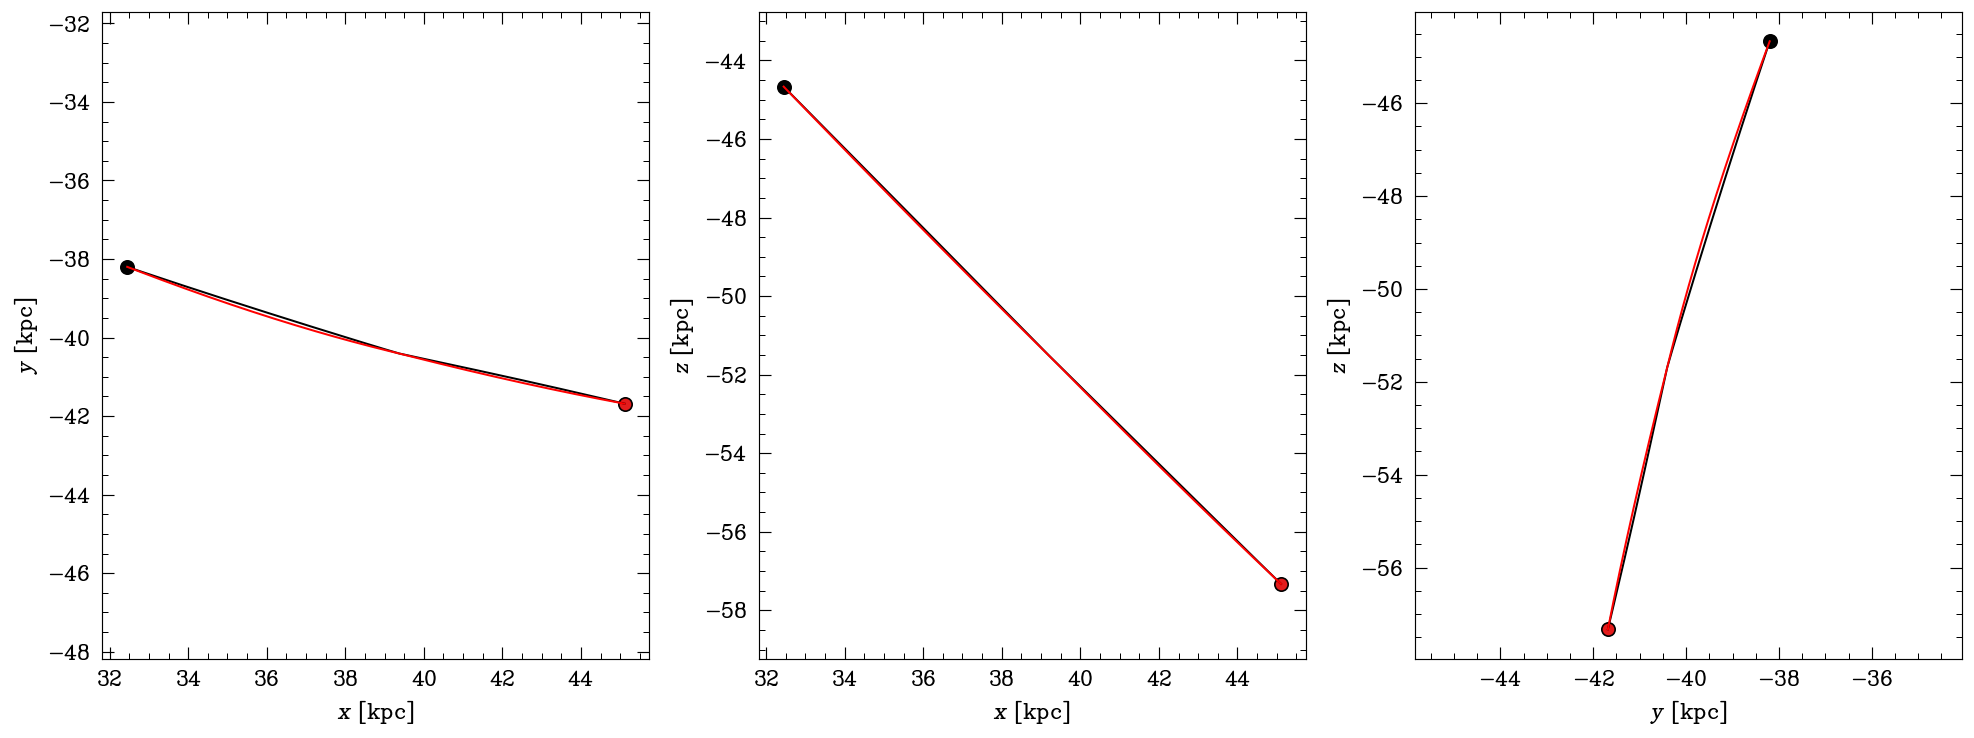

In [17]:
fig, axes = plt.subplots(figsize=(20,7), nrows=1, ncols=3)
x = go_nbody.plot(axes=axes, color="black")
y = go_scf.plot(axes=axes, color="red")


#z = o.forward_orbits[189].plot(axes=axes)
#zz = o.backward_orbits[190].plot(axes=axes)
#axes[0].plot(*pos[:2])
#axes[1].plot(*pos[[0,2]])
#axes[2].plot(*pos[1:])

#axes[0].plot(*pos2[:2])
#axes[1].plot(*pos2[[0,2]])
#axes[2].plot(*pos2[1:])

#axes[0].plot(*pos3[:2])
#axes[1].plot(*pos3[[0,2]])
#axes[2].plot(*pos3[1:])


#axes[0].scatter(*ics.pos[:2])
#axes[0].scatter(*fcs.pos[:2])

#axes[1].scatter(*ics.pos[[0,2]])
#axes[1].scatter(*fcs.pos[[0,2]])

#axes[2].scatter(*ics.pos[1:])
#axes[2].scatter(*fcs.pos[1:])



axes[0].scatter(*fcs2.pos[:2])
axes[1].scatter(*fcs2.pos[[0,2]])
axes[2].scatter(*fcs2.pos[1:])


axes[0].scatter(*ics.pos[:2])
axes[1].scatter(*ics.pos[[0,2]])
axes[2].scatter(*ics.pos[1:])





In [55]:
orbit = o.forward_orbits[188]
orbit_2 = o.backward_orbits[189]

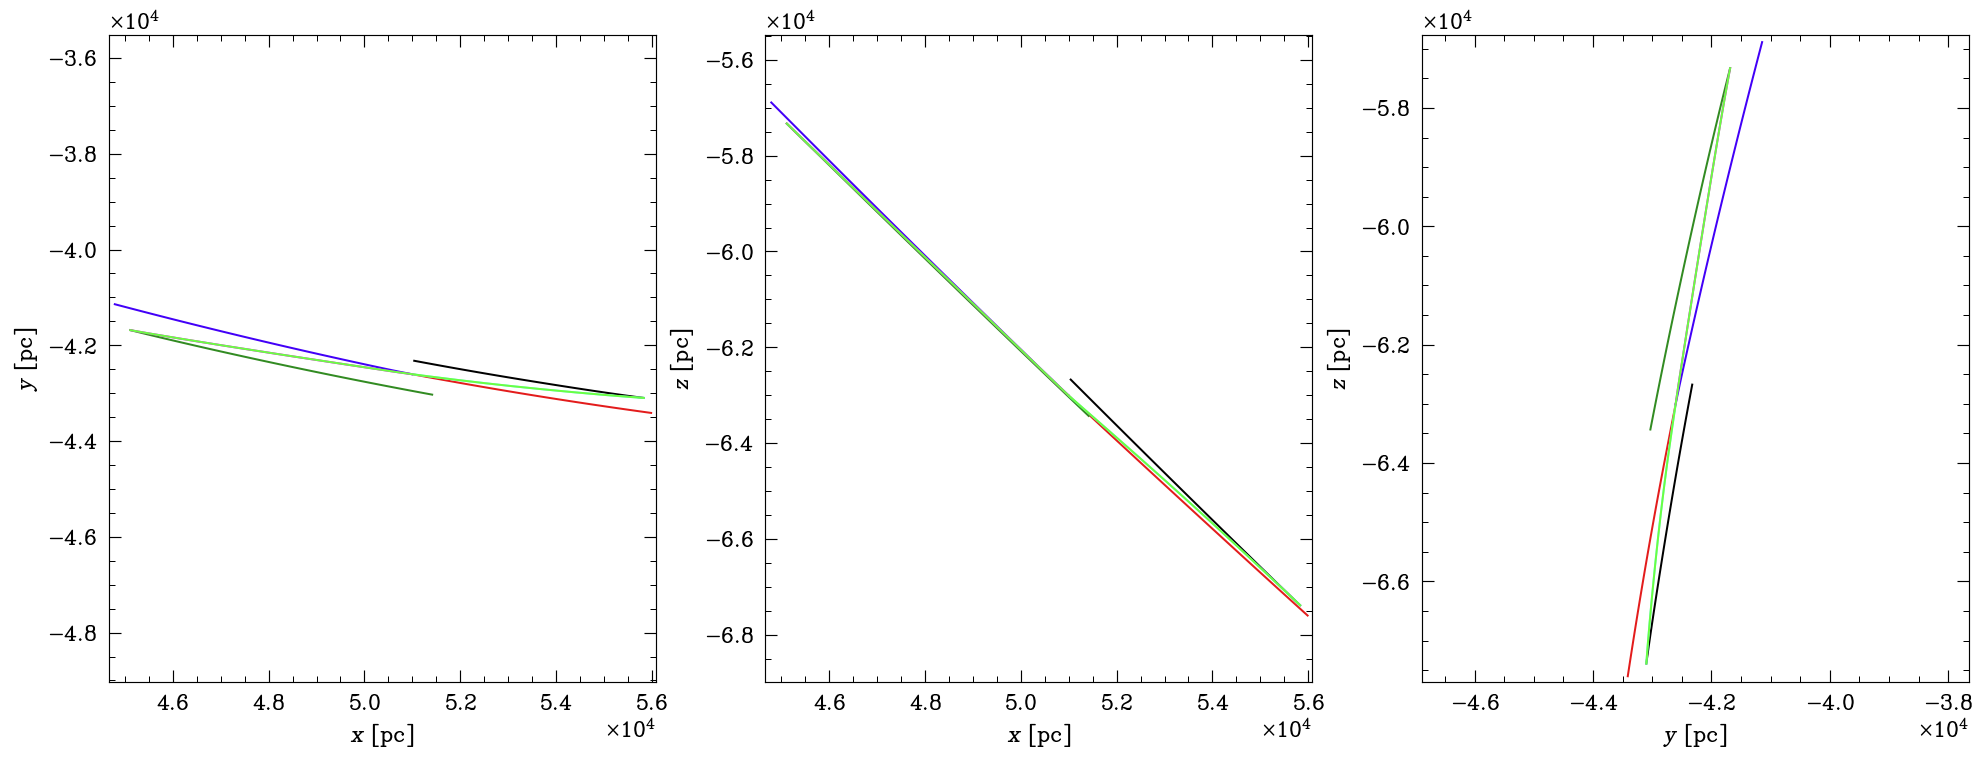

In [58]:
fig, axes = plt.subplots(figsize=(20,7), nrows=1, ncols=3)
x = orbit.plot(axes=axes)
y = orbit_2.plot(axes=axes)


z = o.forward_orbits[189].plot(axes=axes)
zz = o.backward_orbits[190].plot(axes=axes)
axes[0].plot(*pos[:2])
axes[1].plot(*pos[[0,2]])
axes[2].plot(*pos[1:])

axes[0].plot(*pos2[:2])
axes[1].plot(*pos2[[0,2]])
axes[2].plot(*pos2[1:])

axes[0].plot(*pos3[:2])
axes[1].plot(*pos3[[0,2]])
axes[2].plot(*pos3[1:])


axes[0].scatter(*ics.pos[:2])
axes[0].scatter(*fcs.pos[:2])

axes[1].scatter(*ics.pos[[0,2]])
axes[1].scatter(*fcs.pos[[0,2]])

axes[2].scatter(*ics.pos[1:])
axes[2].scatter(*fcs.pos[1:])



axes[0].scatter(*fcs2.pos[:2])

axes[1].scatter(*fcs2.pos[[0,2]])

axes[2].scatter(*fcs2.pos[1:])

axes[0].set_xlim(44, 57)

In [35]:
o.orbits[188].xyz

AttributeError: 'NoneType' object has no attribute 'xyz'

In [60]:
o.orbits[189].xyz

<Quantity [[ 50994.88529036,  50946.39053126,  50897.93990788,
             50849.56108967,  50801.26366604,  50753.05460341,
             50704.95936559,  50656.94848968,  50609.01778823,
             50561.16935593,  50513.40272721,  50465.70148879,
             50418.04604824,  50370.42400949,  50322.82661814,
             50275.2467475 ,  50227.67677956,  50180.11386109,
             50132.5665546 ,  50085.03028309,  50037.49878884,
             49989.96734448,  49942.43242718,  49894.8913183 ,
             49847.34178033,  49799.78189736,  49752.20974255,
             49704.62335835,  49657.02075441,  49609.39985713,
             49561.75872667,  49514.09509624,  49466.40608336,
             49418.68774006,  49370.93534255,  49323.1481774 ,
             49275.33010961,  49227.4821025 ,  49179.60303803,
             49131.69134422,  49083.74543307,  49035.76380664,
             48987.74530725,  48939.68946764,  48891.59665021,
             48843.46724018,  48795.3009172 ,  48747.09

In [62]:
o.orbits[188].vxyz

<Quantity [[-13.32285636, -13.30307204, -13.26707379, -13.21452419,
            -13.17164096, -13.13734837, -13.10907781, -13.08576714,
            -13.06762004, -13.05473413, -13.04581185, -13.03806691,
            -13.03017704, -13.02358248, -13.01945492, -13.01766998,
            -13.01784686, -13.01948658, -13.02180515, -13.0243234 ,
            -13.0272616 , -13.03089449, -13.03525114, -13.0402343 ,
            -13.04563909, -13.05129973, -13.05718176, -13.06339243,
            -13.07006427, -13.07729284, -13.08513685, -13.09360986,
            -13.10274733, -13.11260217, -13.12321257, -13.13472471,
            -13.1477059 , -13.16425654, -13.18485897, -13.20179653,
            -13.2135271 , -13.22534565, -13.23766719, -13.25047259,
            -13.26375778, -13.27750555, -13.2916328 , -13.30600624,
            -13.32055195, -13.33526563, -13.35016996, -13.36530695,
            -13.38070709, -13.39638467, -13.4123485 , -13.42861574,
            -13.44519617, -13.46207589, -13.4792

In [61]:
o.orbits[189].vxyz

<Quantity [[-14.51999991, -14.51691221, -14.50478039, -14.48727173,
            -14.46722883, -14.44238741, -14.41785192, -14.39772703,
            -14.37763506, -14.35705514, -14.33858107, -14.32490083,
            -14.31548452, -14.30885088, -14.30428525, -14.30164634,
            -14.30034707, -14.29812404, -14.29522391, -14.29370782,
            -14.29360559, -14.29454543, -14.29625393, -14.29855649,
            -14.30134441, -14.30457708, -14.30826279, -14.31241306,
            -14.31704703, -14.32216063, -14.32778459, -14.33405522,
            -14.34121438, -14.34952895, -14.3585531 , -14.36708773,
            -14.37489666, -14.38266892, -14.39075738, -14.39923022,
            -14.40808037, -14.41725047, -14.42659794, -14.43590966,
            -14.44506418, -14.45415367, -14.46335316, -14.47277699,
            -14.48247192, -14.4924299 , -14.50246192, -14.51256501,
            -14.52295777, -14.53363218, -14.54452313, -14.55562098,
            -14.56692362, -14.57842917, -14.5901

In [63]:
ics.vel, ics.pos

(<Quantity [-93.25999451,  11.58000183,  88.15000153] km / s>,
 <Quantity [ 55.83110733, -43.09883033, -67.38755056] kpc>)

In [64]:
fcs.vel, fcs.pos

(<Quantity [-101.63999939,   19.17999268,   96.66000366] km / s>,
 <Quantity [ 50.99488529, -42.60371338, -63.00622526] kpc>)

In [65]:
o.full_orbit

In [ ]:
gp.PotentialParameter()

In [14]:
from galexquared.orbit_interpolation import ParticlePotential

In [146]:
pp = ParticlePotential(sp["nbody", "mass"], sp["nbody", "coordinates"], sp["nbody", "softening"], units=[u.Gyr, u.kpc, u.Msun, u.deg, u.km/u.s])
pp.energy([0,0,0] * u.kpc)

<Quantity [-90.50295542] kpc2 / Gyr2>

In [151]:
pp2 = ParticlePotential(sp["nbody", "mass"], sp["nbody", "coordinates"], sp["nbody", "softening"], units=[u.Gyr, u.kpc, u.Msun, u.deg, u.km/u.s])

In [152]:
import astropy.units as u

import gala.dynamics as gd
import gala.integrate as gi
import gala.potential as gp
from gala.units import UnitSystem


class AverageParticlePotential(gp.PotentialBase):
    m = gp.PotentialParameter("mass", physical_type="mass")
    pos = gp.PotentialParameter("pos", physical_type="length")
    soft = gp.PotentialParameter("soft", physical_type="length")
    ndim = 3
    
    def _energy(self, q, t=0):
        pot = self.pot1.energy(q[0]) + self.pot2.energy(q[0])
        return 0.5 * pot / pot.unit

    def _acceleration(self, q, t=0):
        accel = self.pot1.acceleration(q[0]) + self.pot2.acceleration(q[0])
        return 0.5 * accel / accel.unit

    def _gradient(self, q, t=0):
        accel = self.pot1.acceleration(q[0]) + self.pot2.acceleration(q[0])
        return -0.5 * accel / accel.unit



class EvolvingParticlePotential(gp.PotentialBase):
    m = gp.PotentialParameter("mass", physical_type="mass")
    pos = gp.PotentialParameter("pos", physical_type="length")
    soft = gp.PotentialParameter("soft", physical_type="length")
    t1 = gp.PotentialParameter("t1", physical_type="time")
    t2 = gp.PotentialParameter("t2", physical_type="time")

    ndim = 3
    
    def _energy(self, q, t=0):
        pot = self.pot1.energy(q[0]) * (1-t) + self.pot2.energy(q[0]) * t 
        return  pot / pot.unit

    def _acceleration(self, q, t=0):
        accel = self.pot1.acceleration(q[0]) + self.pot2.acceleration(q[0])
        return  accel / accel.unit

    def _gradient(self, q, t=0):
        t_ini, t_fin = self.parameters["t1"], self.parameters["t2"]
        accel = self.pot1.acceleration(q[0]) * (t_fin - t) / (t_fin - t_ini) + self.pot2.acceleration(q[0]) * (t - t_ini) / (t_fin - t_ini)
        return -1 * accel / accel.unit

In [153]:
avpot = AverageParticlePotential([1,1,1] * u.Msun, [[0,0,0]] * u.kpc, [0,0,0] * u.kpc, units=[u.Gyr, u.kpc, u.Msun, u.deg, u.km/u.s])
avpot.pot1 = pp
avpot.pot2 = pp2

In [141]:
avpot.energy([0,0,0] * u.kpc)

<Quantity [-497.76625484] kpc2 / Gyr2>

In [147]:
evpot = EvolvingParticlePotential([1,1,1] * u.Msun, [[0,0,0]] * u.kpc, [0,0,0] * u.kpc, t1=0*u.Gyr, t2=1*u.Gyr, units=[u.Gyr, u.kpc, u.Msun, u.deg, u.km/u.s])
evpot.pot1 = pp
evpot.pot2 = pp2

In [149]:
evpot.energy([0,0,0] * u.kpc, t=1)

<Quantity [-905.02955425] kpc2 / Gyr2>

In [81]:
pp._compute_tree_ifnone()

In [82]:
tree = pp.tree

In [90]:
import time
from pytreegrav import PotentialTarget
st = time.time()

pot = PotentialTarget(
    pos_target=sp["nbody", "coordinates"][7:9, :].to("kpc"), 
    pos_source=sp["nbody", "coordinates"].to("kpc"), 
    m_source=0.5*sp["nbody", "mass"].to("Msun"),
    G=4.3E-6,
    parallel=True,
    quadrupole=True,
    tree=tree
)
ft = time.time()
print(ft - st, pot)

0.013487815856933594 [-7723.82440982 -7491.28645017]


In [87]:
7723/2

3861.5

In [156]:
import gala.dynamics as gd
import gala.potential as gp
import gala.integrate as gi

from concurrent.futures import ProcessPoolExecutor

pos, vel = (sat_params["center"] - sp.center).to("kpc").value, (sat_params["center_vel"] - halo_params["center_vel"]).to("km/s").value

ics = gd.PhaseSpacePosition(
    pos=pos * u.kpc,
    vel=vel * u.km/u.s
)

orbit = gp.Hamiltonian(avpot).integrate_orbit(ics, dt=0.001 * u.Gyr, n_steps=40000, units=[u.Gyr, u.kpc, u.Msun, u.deg, u.km/u.s])

        


TypeError: parse_time_specification() got multiple values for argument 'units'

In [21]:
orbit.v_xyz

<Quantity [[-103.94846383, -103.94845185, -103.94843988, ...,
            -103.37747732, -103.3774634 , -103.37744947],
           [  19.61561184,   19.61562351,   19.61563519, ...,
              20.00149965,   20.00150632,   20.001513  ],
           [  98.85536162,   98.85537328,   98.85538495, ...,
              99.12894204,   99.12894418,   99.12894633]] kpc / Gyr>

In [75]:
real_pos = MT.CompleteTree[(MT.CompleteTree["Sub_tree_id"] == 262) & (MT.CompleteTree["Snapshot"] >= 205)].sort_values("Snapshot")[["Redshift", "position_x", "position_y", "position_z"]]
real_pos.reset_index(drop=True, inplace=True)
real_pos["real_x"] = real_pos["position_x"] / (1 + real_pos["Redshift"])
real_pos["real_y"] = real_pos["position_y"] / (1 + real_pos["Redshift"])
real_pos["real_z"] = real_pos["position_z"] / (1 + real_pos["Redshift"])
real_pos


,Redshift,position_x,position_y,position_z,real_x,real_y,real_z
0,2.658581,41556.855469,44717.277344,43406.964844,11358.735136,12222.573234,11864.425523
1,2.628184,41558.035156,44744.828125,43410.785156,11454.226054,12332.569963,11964.881027
2,2.600879,41558.988281,44770.414062,43414.687500,11541.346311,12433.191340,12056.692527
3,2.571556,41560.800781,44797.910156,43418.503906,11636.607950,12542.966153,12156.746219
4,2.541578,41562.765625,44826.617188,43422.492188,11735.661953,12657.243037,12260.774321
...,...,...,...,...,...,...,...
57,1.378234,41448.964844,45908.847656,43642.921875,17428.460828,19303.752363,18350.975885
58,1.359826,41424.531250,45932.312500,43667.437500,17554.059291,19464.276666,18504.513240
59,1.340002,41395.800781,45960.085938,43696.296875,17690.495779,19641.043075,18673.612802
60,1.320186,41366.312500,45989.230469,43727.210938,17828.880330,19821.357935,18846.427537


In [76]:
real_hsot_pos = MT.CompleteTree[(MT.CompleteTree["Sub_tree_id"] == 1) & (MT.CompleteTree["Redshift"] <= 2.668581) & (MT.CompleteTree["Redshift"] >= 1.300278)].sort_values("Snapshot")[["Redshift", "position_x", "position_y", "position_z"]]
real_hsot_pos.reset_index(drop=True, inplace=True)
real_hsot_pos["real_x"] = real_hsot_pos["position_x"] / (1 + real_hsot_pos["Redshift"])
real_hsot_pos["real_y"] = real_hsot_pos["position_y"] / (1 + real_hsot_pos["Redshift"])
real_hsot_pos["real_z"] = real_hsot_pos["position_z"] / (1 + real_hsot_pos["Redshift"])
real_hsot_pos

,Redshift,position_x,position_y,position_z,real_x,real_y,real_z
0,2.658581,41866.785156,44976.625000,43247.042969,11443.448216,12293.460728,11820.714078
1,2.628184,41858.164062,44992.519531,43251.230469,11536.947586,12400.838670,11920.904562
2,2.600879,41850.128906,45006.714844,43255.769531,11622.198972,12498.814428,12012.559419
3,2.571556,41841.882812,45022.566406,43261.015625,11715.308104,12605.867653,12112.651077
4,2.541578,41834.089844,45038.390625,43265.269531,11812.273056,12717.039382,12216.380934
...,...,...,...,...,...,...,...
57,1.378234,41341.683594,46007.980469,43779.261719,17383.351208,19345.435728,18408.304063
58,1.359826,41331.609375,46027.664062,43789.417969,17514.682718,19504.682844,18556.203683
59,1.340002,41319.875000,46049.472656,43800.816406,17658.048896,19679.242490,18718.279224
60,1.320186,41308.949219,46071.425781,43812.265625,17804.156757,19856.784114,18883.086106


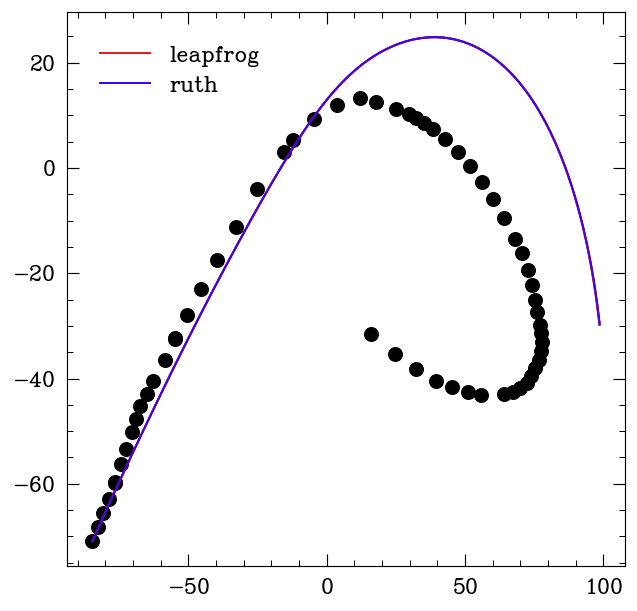

In [72]:
plt.plot(orbit.x, orbit.y)
plt.plot(orbit_lp.x, orbit_lp.y , label="leapfrog")
plt.plot(orbit_ruth.x, orbit_ruth.y, label="ruth")

plt.scatter(real_pos["real_x"] - real_hsot_pos["real_x"], real_pos["real_y"]  - real_hsot_pos["real_y"])
plt.legend()
plt.show()

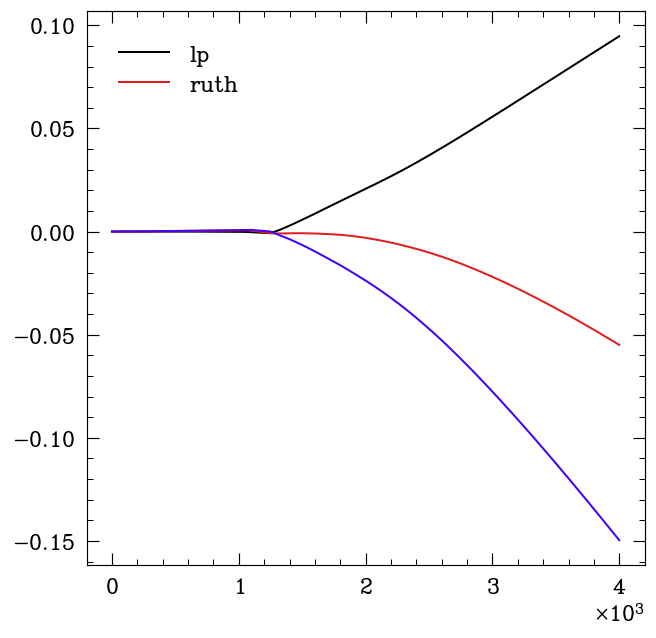

In [73]:
plt.plot(orbit.x - orbit_lp.x, label="lp")
plt.plot(orbit.x - orbit_ruth.x, label="ruth")

plt.plot(orbit_lp.x - orbit_ruth.x)
plt.legend()

In [95]:
orbit.t

<Quantity [0.000e+00, 1.000e+00, 2.000e+00, ..., 3.998e+03, 3.999e+03,
           4.000e+03] Myr>

In [109]:

dt = 1.039 * u.Myr
time_diff = 0.789 * u.Gyr

nstep = np.round(time_diff / dt).astype(int)
dt = (time_diff / dt) / nstep * dt  
dt.to("Myr")

<Quantity 0.789 Myr>

In [110]:
dt.unit

Unit("Myr")

### Pruebas Pytreegrav

In [20]:
st = time.time()
pot, tree = Potential(
    pos=sp["nbody", "coordinates"].to("kpc"), 
    m=sp["nbody", "mass"].to("Msun"),
    G=4.3E-6,
    tree=tree,
    parallel=True,
    return_tree=True
)
ft = time.time()

print(ft - st)

21.22878909111023


In [32]:
st = time.time()

pot, tree = PotentialTarget(
    pos_target=sp["nbody", "coordinates"][0:2, :].to("kpc"), 
    pos_source=sp["nbody", "coordinates"].to("kpc"), 
    m_source=sp["nbody", "mass"].to("Msun"),
    G=4.3E-6,
    parallel=False,
    quadrupole=True,
    return_tree=True
)
ft = time.time()

print(ft - st, pot)

2.3853256702423096 [-14928.56710598 -15004.75195213]


In [38]:
st = time.time()

pot = PotentialTarget(
    pos_target=sp["nbody", "coordinates"][3:5, :].to("kpc"), 
    pos_source=sp["nbody", "coordinates"].to("kpc"), 
    m_source=sp["nbody", "mass"].to("Msun"),
    G=4.3E-6,
    parallel=False,
    quadrupole=True,
    tree=tree
)
ft = time.time()
print(ft - st, pot)

0.011820793151855469 [-15118.18752976 -15274.08074195]


In [18]:
st = time.time()

pot = PotentialTarget(
    pos_target=sp["nbody", "coordinates"][7:9, :].to("kpc"), 
    pos_source=sp["nbody", "coordinates"].to("kpc"), 
    m_source=sp["nbody", "mass"].to("Msun"),
    G=4.3E-6,
    parallel=True,
    quadrupole=True,
    tree=tree
)
ft = time.time()
print(ft - st, pot)

0.053183555603027344 [-14232.00774462 -14330.05872952]


In [117]:
ds = MT.ds
sp = MT.ds.sphere(halo_params["center"], 2 * halo_params["rvir"])

In [118]:
sp["nbody", "mass"]

unyt_array([281601.26104771, 281601.26104771, 281601.26104771, ...,
        12563.97062868,  16220.52811267,  13301.90429539], 'Msun')

In [128]:
pos = np.concatenate((sp["nbody", "coordinates"].to("kpc"),sp["nbody", "coordinates"].to("kpc")))
mass = np.concatenate((sp["nbody", "mass"].to("Msun"),sp["nbody", "mass"].to("Msun"))) * 0.5


In [1]:
import time
st = time.time()

tree = ConstructTree(
    pos=sp["nbody", "coordinates"].to("kpc"),
    m=sp["nbody", "mass"].to("Msun"),
    quadrupole=True,
    morton_order=False
)
ft = time.time()
print(ft - st)

NameError: name 'ConstructTree' is not defined

In [120]:
ConstructTree

<function time.time>

### SCF

In [51]:
S, T = potential.scf.compute_coeffs_discrete(
    sp["darkmatter", "coordinates"] - halo_params["center"],
    sp["darkmatter", "mass"],
    13,
    4,
    10,
    pool=mp.Pool(20)
)

In [52]:
from astropy import units as u

In [53]:
pot = potential.scf.SCFPotential(1, 10, S, T, units=[u.kpc, u.Msun, u.Gyr, u.rad, u.km/u.s])

(<Figure size 720x720 with 1 Axes>,
 <Axes: xlabel='$R$ [$\\mathrm{kpc}$]', ylabel='$v_{\\rm circ}$ [$\\mathrm{km\\,s^{-1}}$]'>)

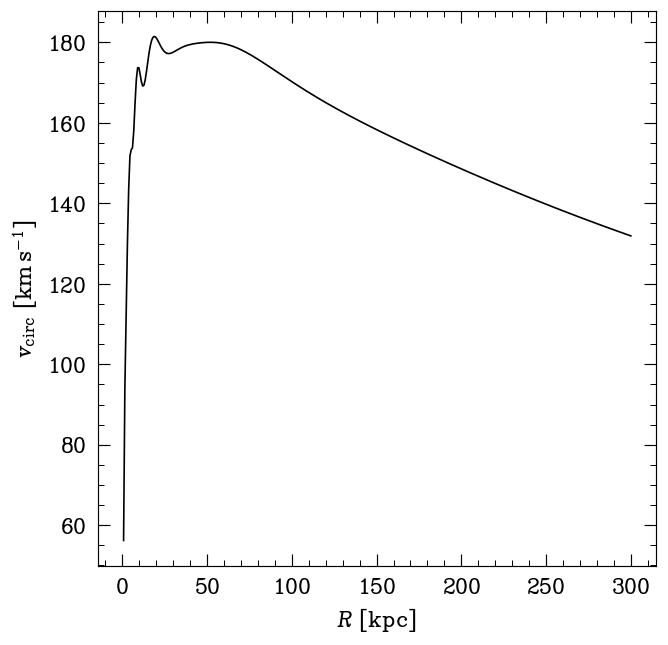

In [54]:
pot.plot_rotation_curve(np.linspace(0, 300, 400))